In [23]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns


In [4]:
#Reading from CSV File and Storing in Dataframe
X = pd.read_csv('../../Dataset/x_train_all.csv')
y = pd.read_csv('../../Dataset/y_train_all.csv')

In [5]:
#Printing the shapes of the training
print("========================================")
print("Shape of X is  :", X.shape)
print("Shape of y is  :", y.shape)
print("========================================")

Shape of X is  : (9690, 2304)
Shape of y is  : (9690, 1)


In [6]:
#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Printing the shapes of the training
print("========================================")
print("=   Shape to train and test Dataset    =")
print("========================================")
print("= Shape of X_train is  :", X_train.shape)
print("= Shape of y_train is  :", y_train.shape)
print("= Shape of X_test is   :", X_test.shape)
print("= Shape of y_test is   :", y_test.shape)
print("========================================")

=   Shape to train and test Dataset    =
= Shape of X_train is  : (7752, 2304)
= Shape of y_train is  : (7752, 1)
= Shape of X_test is   : (1938, 2304)
= Shape of y_test is   : (1938, 1)


In [40]:
# Create the sampler
rus = RandomUnderSampler(random_state=42)
# Resample the training data
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

#Resampling the testing data
X_resampled_test, y_resampled_test = rus.fit_resample(X_test, y_test)

In [33]:
#Printing the shapes of the training
print("========================================")
print("=   Shape to train and test Dataset    =")
print("========================================")
print("= Shape of X_resampled is  :", X_resampled.shape)
print("= Shape of y_resampled is  :", y_resampled.shape)
print("= Shape of X_resampled_test is   :", X_resampled_test.shape)
print("= Shape of y_resampled_test is   :", y_resampled_test.shape)
print("========================================")

=   Shape to train and test Dataset    =
= Shape of X_resampled is  : (1640, 2304)
= Shape of y_resampled is  : (1640, 1)
= Shape of X_resampled_test is   : (440, 2304)
= Shape of y_resampled_test is   : (440, 1)


In [41]:
#Scaling the data
X_resampled = X_resampled/255
X_resampled_test = X_resampled_test/255

In [42]:
#Creating the object of model and fitting the data
nb_classifier = MultinomialNB()
nb_classifier.fit(X_resampled, y_resampled)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [43]:
y_pred = nb_classifier.predict(X_resampled_test)

In [45]:
accuracy = accuracy_score(y_resampled_test, y_pred)
print("========================================")
print("=   Accuracy of the model is           =")
print("========================================")
print("= Accuracy Score is :", accuracy)
print("========================================")

=   Accuracy of the model is           =
= Accuracy Score is : 0.3568181818181818


Text(0.5, 1.0, 'Confusion Matrix')

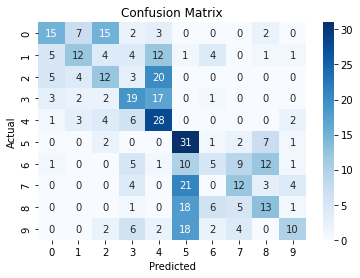

In [46]:
#Printing the confusion matrix
cm = confusion_matrix(y_resampled_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")


In [47]:
#Printing the classification report
print("========================================")
print("=   Classification Report of the model is   =")
print("========================================")
print(classification_report(y_resampled_test, y_pred))
print("========================================")

=   Classification Report of the model is   =
              precision    recall  f1-score   support

           0       0.50      0.34      0.41        44
           1       0.43      0.27      0.33        44
           2       0.29      0.27      0.28        44
           3       0.38      0.43      0.40        44
           4       0.34      0.64      0.44        44
           5       0.31      0.70      0.43        44
           6       0.26      0.11      0.16        44
           7       0.38      0.27      0.32        44
           8       0.34      0.30      0.32        44
           9       0.50      0.23      0.31        44

    accuracy                           0.36       440
   macro avg       0.37      0.36      0.34       440
weighted avg       0.37      0.36      0.34       440

